## **Logistic regression** 
is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

Logistic regression is named for the function used at the core of the method, the logistic function.

The logistic function, also called the **sigmoid function** was developed by statisticians to describe properties of population growth in ecology, rising quickly and maxing out at the carrying capacity of the environment. It’s an **S-shaped** curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.

### **1 / (1 + e^-value)**

Where **e** is the base of the natural logarithms **(Euler’s number or the EXP() function in your spreadsheet)** and value is the actual numerical value that you want to transform. Below is a plot of the numbers between -5 and 5 transformed into the range 0 and 1 using the logistic function.


![alt text](https://cdn-images-1.medium.com/max/1024/0*CZJ5hnAavQMN0nV9.png)

here you will notice that the value mentioned in the above equation for logistic function is nothing but **5x and 10x**.

Now that we know what the logistic function is, let’s see how it is used in logistic regression.

Given a **data(X,Y)**, **X** being a matrix of values with m examples and n features and **Y** being a vector with m examples. The objective is to train the model to predict which class the future values belong to. Primarily, we create a weight matrix with random initialization. 

**Then we multiply it by features.**

![alt text](https://miro.medium.com/max/249/1*zgHJk04MnT-KHseMx5UplA.gif)

**We then pass the output to our logistic function**

![alt text](https://miro.medium.com/max/128/1*W-eV7ojoYq8FKTHrDyxKEw.gif)

**This is followed by calculating the cost for that iteration whose formula is**

![alt text](https://miro.medium.com/max/412/1*oWzox2Raoi-HkqEAkdgJuA.gif)

**The derivative of this cost is calculated following which the weights are updated.**

![alt text](https://miro.medium.com/max/150/1*fBcG0OClMcbvR704jynxfQ.gif)

**updated weights**

![alt text](https://miro.medium.com/max/154/1*zbGFw_u7ay1UagAPkE6PMw.gif)

and the whole process repeats itself to converge at the proper weights. Now we are going to look at the basic example on iris dataset provided by sklearn and will see how sigmoid function looks on probabilities (negative and positive).



Y = 1
Y’ = 0.6 ~ 1

1 log(0.6) + (1 - 1) log (1-0.6)


—————

Y = 0
Y’ = 0.1

0 log( 0.4) + (1 - 0) log (1 - 0.1)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
data = load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
df = pd.DataFrame(data=data.data, columns = data.feature_names)
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [7]:
data.target, data.target_names

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [8]:
df['target_class'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


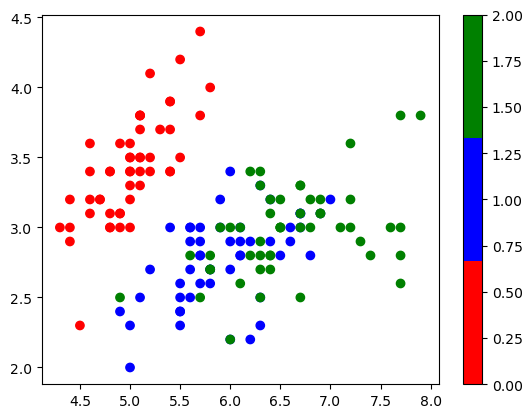

In [9]:
colors = ['red', 'blue', 'green']
plt.scatter(
    df['sepal length (cm)'].values, df['sepal width (cm)'].values, 
    c=df.target_class.values, cmap=matplotlib.colors.ListedColormap(colors)
)
plt.colorbar()

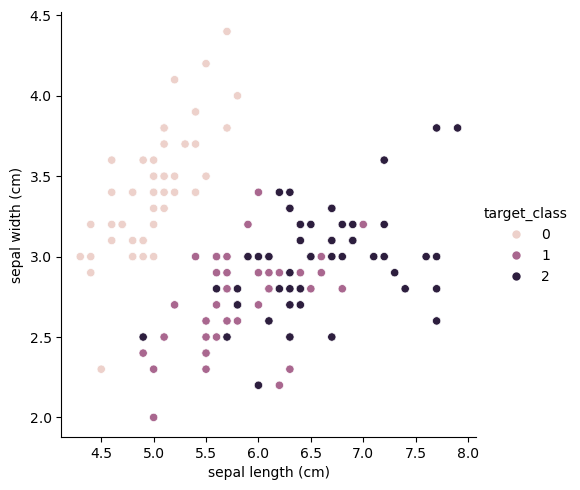

In [10]:
import seaborn as sns
sns.relplot(data = df, x = 'sepal length (cm)', y = 'sepal width (cm)', hue = 'target_class')

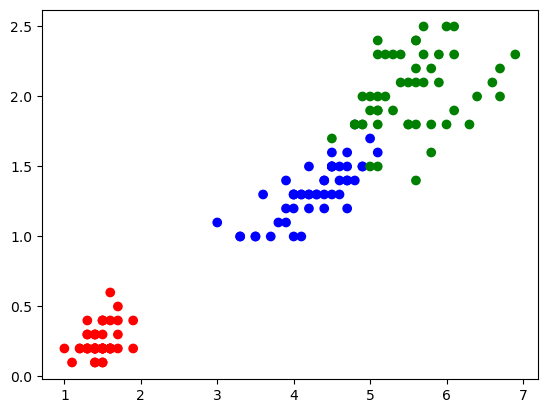

In [11]:
colors = ['red', 'blue', 'green']
plt.scatter(
    df['petal length (cm)'].values, df['petal width (cm)'].values, 
    c=df.target_class.values, cmap=matplotlib.colors.ListedColormap(colors)
)

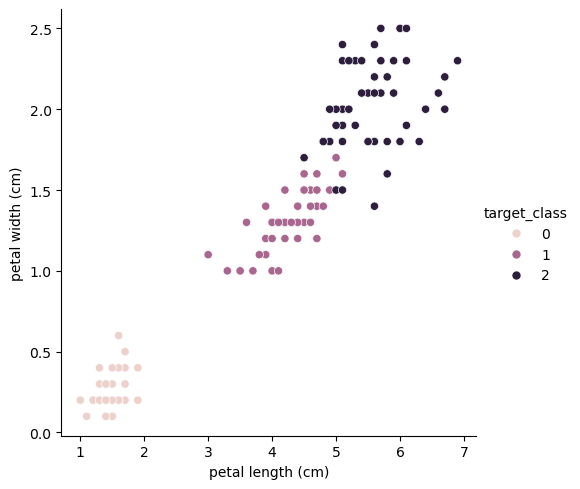

In [12]:
sns.relplot(data = df, x = 'petal length (cm)', y = 'petal width (cm)', hue = 'target_class')

In [13]:
df = df.sample(frac=1.0)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_class
5,5.4,3.9,1.7,0.4,0
13,4.3,3.0,1.1,0.1,0
91,6.1,3.0,4.6,1.4,1
31,5.4,3.4,1.5,0.4,0
45,4.8,3.0,1.4,0.3,0


In [14]:
(df.target_class == 2)

5      False
13     False
91     False
31     False
45     False
       ...  
28     False
19     False
93     False
145     True
32     False
Name: target_class, Length: 150, dtype: bool

In [15]:
x_data = df.iloc[:, 2:3].values
y_data = (df.target_class == 2).astype(np.float32).values

In [16]:
x_data.flatten(), y_data

(array([1.7, 1.1, 4.6, 1.5, 1.4, 4.4, 5.6, 3.9, 3.9, 4.5, 1.4, 5.5, 1.6,
        1.5, 5.1, 5.8, 6.9, 5.6, 4. , 4.5, 1.4, 4. , 1.5, 1.4, 4.9, 4.4,
        6.1, 4.9, 1.6, 4.8, 5.9, 1.5, 4.6, 1.6, 1.7, 1.5, 5.5, 1.7, 1.3,
        4.8, 1.5, 4.2, 1.4, 3.5, 4.7, 5.4, 3.5, 5.7, 4.5, 6. , 5.7, 1.6,
        4.3, 5.2, 1.3, 1.9, 5.6, 4.1, 1. , 5.1, 4.5, 1.3, 4.2, 3.6, 5.9,
        4. , 5. , 1.2, 4.9, 4.7, 1.4, 4.1, 6.6, 4.4, 1.5, 1.4, 1.3, 4. ,
        5.1, 4.2, 1.2, 4.7, 4.9, 1.4, 4.3, 3.3, 1.3, 4.8, 1.3, 5. , 5.6,
        5.1, 1.7, 6.7, 3.9, 5.6, 5.8, 5.7, 1.4, 4.7, 5.4, 4.5, 4.8, 4.5,
        6.1, 6. , 1.5, 5.3, 1.6, 5. , 4.1, 3.8, 5.1, 6.7, 1.4, 4.5, 1.9,
        5.8, 1.4, 1.5, 4.6, 5.1, 1.5, 5.1, 3.7, 6.4, 4.4, 4.9, 1.6, 5.1,
        3. , 1.4, 5.3, 4.2, 1.3, 1.6, 4. , 4.7, 1.5, 5.6, 5.5, 6.1, 6.3,
        5. , 4.5, 1.4, 1.5, 3.3, 5.2, 1.5]),
 array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
        1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0.,


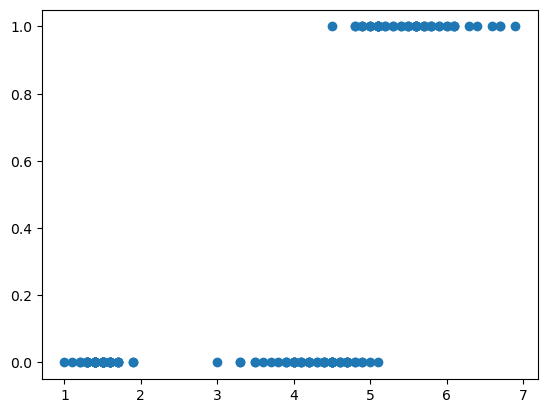

In [17]:
plt.scatter(x_data, y_data)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
log_reg = LogisticRegression()

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=47)

In [20]:
x_train.shape, x_test.shape

((120, 1), (30, 1))

In [21]:
log_reg.fit(x_train, y_train)

LogisticRegression()

In [22]:
y_pred = log_reg.predict(x_test)
x_test.flatten(), y_pred

(array([1.4, 1.7, 5.8, 4.4, 5.8, 6. , 1.3, 4.6, 3.9, 5.7, 1.9, 1.5, 4.7,
        1.4, 4.9, 4.8, 4.2, 1.1, 4. , 5.5, 5.5, 1.3, 5.1, 1.5, 3.7, 5.8,
        5.1, 4. , 5.5, 4.7]),
 array([0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0.], dtype=float32))

In [23]:
y_pred, y_test

(array([0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0.], dtype=float32),
 array([0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0.], dtype=float32))

In [24]:
(y_pred == y_test).sum() / len(y_pred)

1.0

In [25]:
log_reg.classes_

array([0., 1.], dtype=float32)

In [26]:
x_test[:5]

array([[1.4],
       [1.7],
       [5.8],
       [4.4],
       [5.8]])

In [27]:
result = log_reg.predict_proba(x_test)
result[:5]

array([[9.99986697e-01, 1.33025076e-05],
       [9.99964918e-01, 3.50820129e-05],
       [4.76264439e-02, 9.52373556e-01],
       [8.22001492e-01, 1.77998508e-01],
       [4.76264439e-02, 9.52373556e-01]])

In [28]:
log_reg.intercept_, log_reg.coef_

(array([-15.75308093]), array([[3.23252588]]))

In [29]:
x_test.ravel(), y_pred[:5], y_test[:5]

(array([1.4, 1.7, 5.8, 4.4, 5.8, 6. , 1.3, 4.6, 3.9, 5.7, 1.9, 1.5, 4.7,
        1.4, 4.9, 4.8, 4.2, 1.1, 4. , 5.5, 5.5, 1.3, 5.1, 1.5, 3.7, 5.8,
        5.1, 4. , 5.5, 4.7]),
 array([0., 0., 1., 0., 1.], dtype=float32),
 array([0., 0., 1., 0., 1.], dtype=float32))

In [30]:
# 0th cloumn represent proba it does not belong to the class and 1st column represents the proba it belongs to the class
result[:5]

array([[9.99986697e-01, 1.33025076e-05],
       [9.99964918e-01, 3.50820129e-05],
       [4.76264439e-02, 9.52373556e-01],
       [8.22001492e-01, 1.77998508e-01],
       [4.76264439e-02, 9.52373556e-01]])

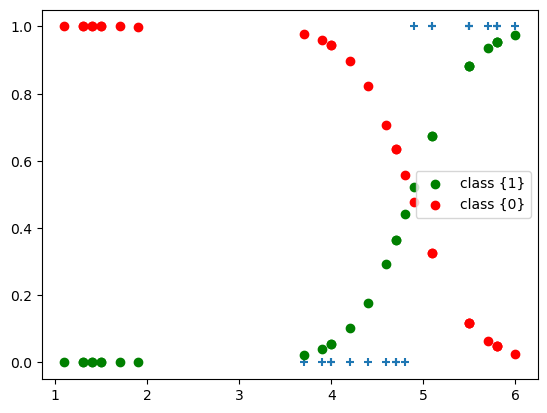

In [31]:
plt.scatter(x_test, y_test, marker='+')
plt.scatter(x_test, result[:, 1], color = 'green', label = 'class {1}')
plt.scatter(x_test, result[:, 0], color = 'red', label = 'class {0}')
plt.legend()

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

# in classification
# accuracy_score = (TP+TN)/(TP+TN+FP+FN)

1.0

In [33]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[19,  0],
       [ 0, 11]])

In [34]:
(cm[0,0] + cm[1, 1]) / (cm.ravel().sum())

1.0

<Axes: >

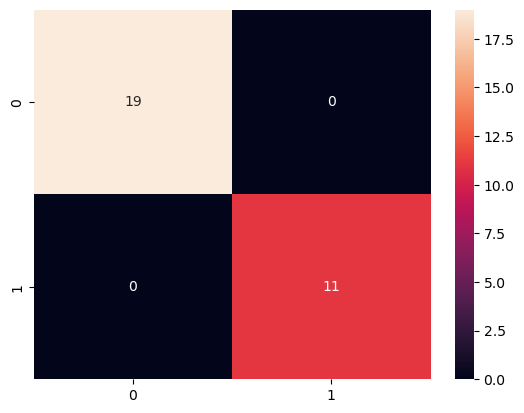

In [35]:
sns.heatmap(cm, annot = True, cbar = True)

In [36]:
[
    ['TP', 'FP'],
    ['FN', 'TN']
]

[['TP', 'FP'], ['FN', 'TN']]

**Let's take an example on our social ads dataset:--**

In [ ]:
dataset = pd.read_csv('./data_folder/Social_Network_Ads.csv')
dataset.head(10)

In [41]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [42]:
X = dataset.iloc[:, 2:4].values
Y = dataset.iloc[:, 4:5].values            

In [43]:
from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(strategy='constant', fill_value=4)
imputer = SimpleImputer() # by default strategy is mean
X = imputer.fit_transform(X)

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [45]:
X[:10]

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283]])

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 47, stratify = dataset.Gender) 

In [47]:
logistic = LogisticRegression()
logistic.fit(X_train, Y_train)
Y_pred = logistic.predict(X_test)

/Users/ravikumarpande/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
cm1 = confusion_matrix(Y_test, Y_pred)
cm1

array([[53,  3],
       [ 8, 16]])

<Axes: >

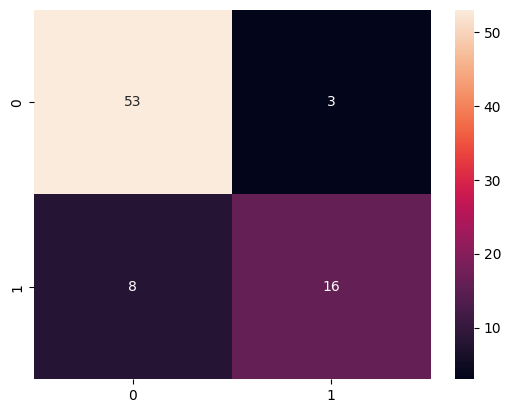

In [49]:
sns.heatmap(cm1, annot = True, cbar = True)

In [85]:
''' there are so many ways with which we can increase our accuracy but we will keep
it aside for some time '''
accuracy_score(Y_test, Y_pred)

0.8625

In [86]:
res = logistic.predict_proba(X_test)
res[:10]

array([[0.73331733, 0.26668267],
       [0.83141278, 0.16858722],
       [0.36344722, 0.63655278],
       [0.67711811, 0.32288189],
       [0.46766806, 0.53233194],
       [0.13939671, 0.86060329],
       [0.08932801, 0.91067199],
       [0.95780735, 0.04219265],
       [0.98751999, 0.01248001],
       [0.97398798, 0.02601202]])

**HeRe we did it ....**

need to add many things in line

confusion matrix

precison

recall

f1 score